![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 7 Assessment: k-medoids clustering

#####################################################################################

Double-click to write down your name and surname.

**Name:**
Alexander

**Surname:**
Kruskal

**Honour Pledge** <p>
    
    
Declaration: <p>
    
    
I declare that this assessment item is my own work, except where acknowledged, and has not been submitted for academic credit elsewhere or previously, or produced independently of this course (e.g. for a third party such as your place of employment) and acknowledge that the assessor of this item may, for the purpose of assessing this item: 

    a. Reproduce this assessment item and provide a copy to another member of the University; and/or 
    b. Communicate a copy of this assessment item to a plagiarism checking service (which may then retain a copy of the assessment item on its database for the purpose of future plagiarism checking). 

#####################################################################################

In this assessment we will look at a clustering algorithm called k-medoids, an algorithm similar to k-means. An introduction to k-medoids can be found here: https://en.wikipedia.org/wiki/K-medoids . 

In k-means the center of a cluster is given by the cluster average or centroid. In k-medoids the center of a cluster is given by a specific data point (the [medoid](https://en.wikipedia.org/wiki/Medoid)). 

K-means minimises the sum of squared Euclidean distances between the elements of a cluster and the cluster's centroid. K-medoids minimises the sum of distances between the elements of a cluster and the cluster's medoid. 

K-medoids can make use of arbitrary distance functions. <font color=red>In this assessment, we always use the [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) as a distance function for k-medoids clustering.</font>

### Question 1 (10 Points)
The Manhattan distance between two observations (comprising multiple variables) is more meaningful than the Euclidean distance when the variables are of a specific kind, which one?

### Answer  
The Manhattan distnce is more meaningful when the variables are independent. Manhattan distance will compound the difference for multiple variables that correlate, but will not consider one variable being really different as a different cluster, where eucidean distance will show a greater difference for one outlier variable.

### Question 2 (20 Points, 5 for each question)
Consider the following synthetic data (__data1__), generated from two clusters with 500 observations each and 2 observed variables x and y. The true labels (and colors in the plot) are for illustration only, remember that in unsupervised learning we generally don't have this information.  
### Data1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
c1 = np.random.multivariate_normal([0,0], 5*np.eye(2), 500)
c2 = np.random.multivariate_normal([10,0], 5*np.eye(2), 500)
data1 = np.vstack([c1, c2])

# plot
idx = np.random.choice(1000, (1000,), replace=False) #random plotting order
color = np.hstack([np.zeros(500), np.ones(500)])
plt.scatter(data1[idx,0], data1[idx,1], c=color[idx])
plt.xlim([-10,20])
plt.ylim([-10,10])
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

Apply k-means with 2 clusters, 20 random initialisations, random_state=42 to this data. Are results as expected? Where is the border (in terms of x-coordinate) between the two clusters?

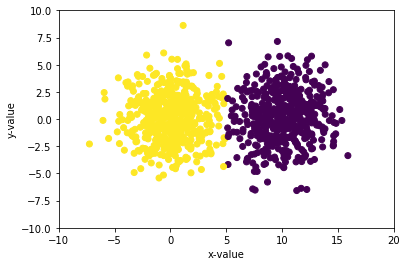

In [2]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=2, random_state=42, n_init=20, init = 'random').fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.xlim([-10,20])
plt.ylim([-10,10])
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

### Results Data1

The kmeans clustering technique splits the data really well in this example. The clusters look very similar to the generated clusters and the split of the data is at the x-value of 5.

### Data2
Consider a similar synthetic dataset (__data2__) and apply k-means (same parameters as before). Are results as expected? Where is the computed border (in terms of x-coordinate) between the two clusters?

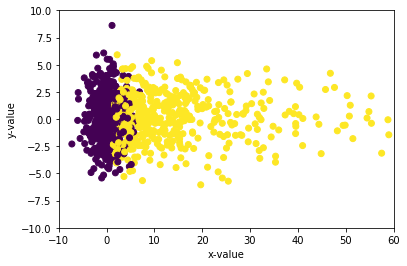

In [3]:
np.random.seed(42)
c1 = np.random.multivariate_normal([0,0], 5*np.eye(2), 500)
c2 = np.random.multivariate_normal([np.log(10),0], [[1,0],[0,5]], 500)
c2[:,0] = np.exp(c2[:,0])

data2 = np.vstack([c1, c2])

# plot
idx = np.random.choice(1000, (1000,), replace=False) #random plotting order
color = np.hstack([np.zeros(500), np.ones(500)])
plt.scatter(data2[idx,0], data2[idx,1], c=color[idx])
plt.xlim([-10,60])
plt.ylim([-10,10])
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

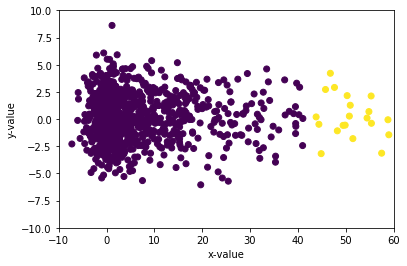

In [4]:
kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=20, init = 'random').fit(data2)

label_kmeans2 = kmeans2.labels_

plt.scatter(data2[:,0], data2[:,1], c=label_kmeans2)
plt.xlim([-10,60])
plt.ylim([-10,10])
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

### Results Data2

The kmeans clustering technique does not cluster data2 well. The clusters are not similar and the k-means algorithm splits the clusters at around 45 for the x-value, where the clusters generated split around the x-value of 2.

### Question 3 (50 Points)
Implement the k-medoids algorithm using the Manhattan distance and apply it to __data2__ (find two clusters as before). You can use a greedy approach and try out every pair of medoids or use a more efficient implementation. Are results improved compared with k-means? Where is the computed border (in terms of x-coordinate) between the two clusters?

In [5]:
print(data2[0][1])

-0.3091683762802727


from tqdm import tqdm

#make lists to choose best medoids at end
medoids_index = []
cluster_costs_list = []
cluster_assign_list =[]

#select every possible pair of medoids
for i in tqdm(range(len(data2))):
    for j in range((len(data2)-i)):
        temp_medoid1 = i
        temp_medoid2 = i+j
        medoids_index.append([temp_medoid1, temp_medoid2])
        
        #grab x and y values for each medoid
        medoid1x = data2[temp_medoid1][0]
        medoid1y = data2[temp_medoid1][1]
        medoid2x = data2[temp_medoid2][0]
        medoid2y = data2[temp_medoid2][1]
        
        #calculate distance and assign cluster for every data point for demoid pair
        temp_cluster_assign = []
        temp_cluster_cost = 0
        for k in range(len(data2)):
            temp_x = data2[k][0] #medoid x value
            temp_y = data2[k][1] #medoid y value
            med1dist = (abs(medoid1x-temp_x) + abs(medoid1y-temp_y)) #distance from medoid 1
            med2dist = (abs(medoid2x-temp_x) + abs(medoid2y-temp_y)) #distance from medoid 2
            if med1dist <= med2dist:
                temp_cluster_assign.append(0)
                temp_cluster_cost = temp_cluster_cost + med1dist
            else:
                temp_cluster_assign.append(1)
                temp_cluster_cost = temp_cluster_cost + med2dist
        cluster_costs_list.append(temp_cluster_cost)
        cluster_assign_list.append(temp_cluster_assign)
        
#get index min cost
index_min_cost = cluster_costs_list.index(min(cluster_costs_list))
#get medoid index pair
medoid_index_pair = medoids_index[index_min_cost]

#use index to get labels and medoid
label = cluster_assign_list[index_min_cost]
medoid1 = data2[medoid_index_pair[0]]
medoid2 = data2[medoid_index_pair[1]]


index_min_cost =cluster_costs_list.index(min(cluster_costs_list))
print(index_min_cost)
print(cluster_costs_list[index_min_cost])
print(cluster_assign_list[index_min_cost])
print(medoids_index[index_min_cost])
medoid_index_pair = medoids_index[index_min_cost]
print(medoid_index_pair)
print(data2[medoid_index_pair[0]][0])
print(data2[medoid_index_pair[1]])
label_kmedoids2 = cluster_assign_list[index_min_cost]


#get index min cost
index_min_cost = cluster_costs_list.index(min(cluster_costs_list))
#get medoid index pair
medoid_index_pair = medoids_index[index_min_cost]

#use index to get labels and medoid
label = cluster_assign_list[index_min_cost]
medoid1 = data2[medoid_index_pair[0]]
medoid2 = data2[medoid_index_pair[1]]

In [6]:
from tqdm import tqdm

def k_medoids_2(data):
    '''
    Implement k-medoids algorithm for subdividing the data into two clusters
    Inputs:
        data: data array with observations as rows and features as columns
    Outputs:
        label: the label assigned to each observation (a binary vector containing zeros and ones)
        medoid1: the medoid of the first cluster
        medoid2: the medoid of the second cluster
    '''                   
    
    #make lists to choose best medoids at end
    medoids_index = []
    cluster_costs_list = []
    cluster_assign_list =[]

    #select every possible pair of medoids
    for i in tqdm(range(len(data2))):
        for j in range((len(data2)-i)):
            temp_medoid1 = i
            temp_medoid2 = i+j
            medoids_index.append([temp_medoid1, temp_medoid2])

            #grab x and y values for each medoid
            medoid1x = data2[temp_medoid1][0]
            medoid1y = data2[temp_medoid1][1]
            medoid2x = data2[temp_medoid2][0]
            medoid2y = data2[temp_medoid2][1]

            #calculate distance and assign cluster for every data point for demoid pair
            temp_cluster_assign = []
            temp_cluster_cost = 0
            for k in range(len(data2)):
                temp_x = data2[k][0] #medoid x value
                temp_y = data2[k][1] #medoid y value
                med1dist = (abs(medoid1x-temp_x) + abs(medoid1y-temp_y)) #distance from medoid 1
                med2dist = (abs(medoid2x-temp_x) + abs(medoid2y-temp_y)) #distance from medoid 2
                if med1dist <= med2dist:
                    temp_cluster_assign.append(0)
                    temp_cluster_cost = temp_cluster_cost + med1dist
                else:
                    temp_cluster_assign.append(1)
                    temp_cluster_cost = temp_cluster_cost + med2dist
            cluster_costs_list.append(temp_cluster_cost)
            cluster_assign_list.append(temp_cluster_assign)

    #get index min cost
    index_min_cost = cluster_costs_list.index(min(cluster_costs_list))
    #get medoid index pair
    medoid_index_pair = medoids_index[index_min_cost]

    #use index to get labels and medoid outpust
    label = cluster_assign_list[index_min_cost]
    medoid1 = data2[medoid_index_pair[0]]
    medoid2 = data2[medoid_index_pair[1]]   
    
    return label, medoid1, medoid2

label_kmedoids2, medoid1, medoid2 = k_medoids_2(data2)
print(medoid1)
print(medoid2)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:51<00:00,  2.09s/it]


[1.38696586 0.14416917]
[23.4614528   0.15172953]


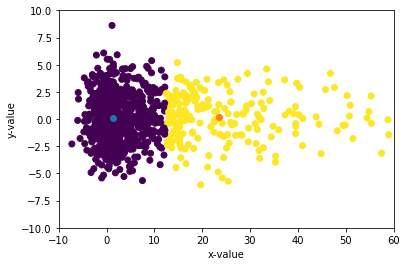

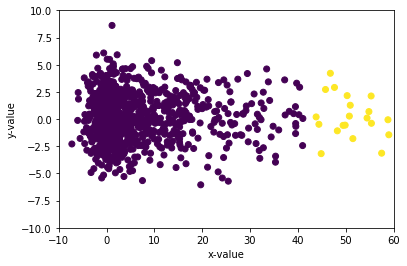

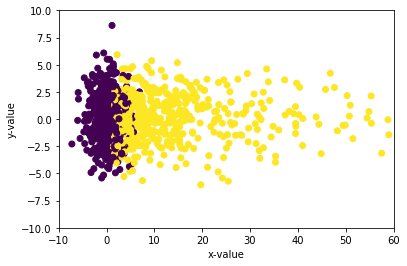

In [7]:
# k-medoids clustering
plt.scatter(data2[:,0], data2[:,1], c=label_kmedoids2)
plt.xlim([-10,60])
plt.ylim([-10,10])
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.scatter(medoid1[0],medoid1[1])
plt.scatter(medoid2[0],medoid2[1])
plt.show()


# k-means clustering
plt.scatter(data2[:,0], data2[:,1], c=label_kmeans2)
plt.xlim([-10,60])
plt.ylim([-10,10])
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

# true label
idx = np.random.choice(1000, (1000,), replace=False) #random plotting order
color = np.hstack([np.zeros(500), np.ones(500)])
plt.scatter(data2[idx,0], data2[idx,1], c=color[idx])
plt.xlim([-10,60])
plt.ylim([-10,10])
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

### Question 4 (20 Points)
Why are the k-medoids results different from k-means on __data2__? (15 points)

_Hint: notice that the x values of the generated clusters have either normal or log-normal distribution. What is their mean and median? How does this relate to the cost function that k-means and k-medoids are trying to minimise?_

Do you expect k-means and k-medoids results to differ on __data1__? why? (5 points)

K-means assumes that data is clustered spherically and evenly sized between clusters. K-medoids just tries to minimise the distance between two existing data points. Data2 is log-normally distributed, where data1 is normally distributed between x and y (forms spheres). Because k-means cost function assumes a sphere, and k-medoids minimises distance from a point to all points (not artificially creating a centroid, k-medoids is more accurate, especially with non-normally distributed dasta. 

I would not expect K-means and k-medoids to perform differently on data1 because k-medoids is more rebust, not assuming a normal distribution for x and y, but able to handle it well anyway.